# Learning the digits

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [26]:
X = np.load('digits_pixels.npy')
y = np.load('digits_target.npy')

In [27]:
y = to_categorical(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# Initialize a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu
model.add(Dense(16, input_shape=(64, ), activation='relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Test if the model is well assembled by predicting before training
print(model.predict(X_train))

[[2.0864225e-11 3.1978080e-01 2.8544691e-01 ... 1.2437615e-10
  3.8900232e-01 5.7456503e-03]
 [1.1778319e-06 3.2076968e-03 4.5000758e-02 ... 1.3282681e-09
  9.1326386e-01 3.8222548e-02]
 [6.2739125e-10 3.2469231e-08 3.1716302e-02 ... 5.1251389e-15
  9.6723729e-01 1.0464329e-03]
 ...
 [1.0307412e-09 1.3423678e-04 9.2027879e-01 ... 7.2041990e-12
  2.8637044e-02 5.0900981e-02]
 [1.9029986e-10 7.0805162e-01 2.5751957e-01 ... 1.5513894e-08
  5.6073675e-04 3.3729583e-02]
 [2.4495198e-06 2.7348569e-02 2.2191218e-01 ... 6.0983782e-04
  5.4283749e-04 5.0877869e-01]]


## Overfitting model

In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

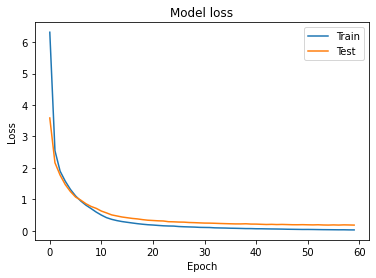

In [34]:
h_callback = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

## More data?

In [35]:
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
    plt.title('Accuracy vs Number of training samples')
    plt.xlabel('# of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")

In [36]:
initial_weights = model.get_weights()

In [37]:
from keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='loss', patience=1)
train_accs, test_accs = [], []
training_sizes = [125, 502, 879, 1255]

Epoch 1/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0304 - accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 11/50
4/4 [=====================

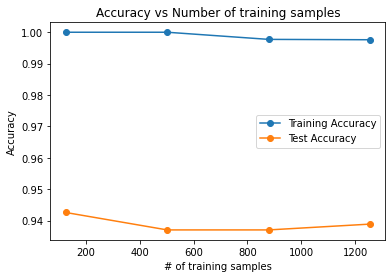

In [39]:
for size in training_sizes:
    # Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]
    
    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs=50, callbacks=[early_stop])
    
    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])

# Plot train vs test accuracies
plot_results(train_accs, test_accs)